## K - means


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')
# tammpilkan 3 baris pertama
df.head(3)

In [3]:
# tammpilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
# ubah namma kolom
df = df.rename(columns={'Gender': 'gender', 
                        'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [5]:
# Import K-means
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

clusters = []   # membuat list yang berisi inertia berupa Variabel CLUSTER.

for i in range(1,11):
  # Variabel km berisikan Dataframe X yang telah diolah dengan Algoritma K-means.
  km = KMeans(n_clusters=i).fit(X)

  # Memasukan Variabel km kedalam Variabel Cluster dan di olah lagi dengan bantuan METODE ELBOW untuk -
  # menentukan Jumlah K yang optimal / mencari titik turun yang TIDAK signifikan.  
  clusters.append(km.inertia_) 
  # Nantinya masuk  di Sumbu Y !!!!.

Text(0, 0.5, 'Inertia')

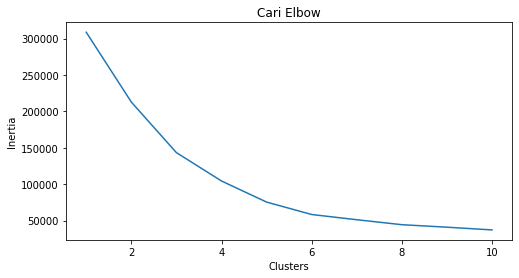

In [6]:
# membuat plot / GRAFIK  inertia
fig, ax = plt.subplots(figsize=(8, 4))
# plt.subplots() adalah fungsi mengembalikan tuple yang berisi figure dan axes object, -
# - Jadi ketika menggunakan fig, ax = plt.subplots() kita memisahkan tuple menjadi variable fig dan ax
# - Dengan fig adalah digunakan untuk mengubah figur-level attribute (dalam hal ini ukuran bidang grafik)

sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
# Membuat / Mengisi Nilai grafik garis dengan:
# -sumbu x = jumlah pada cluster
# -sumbu y = list yang berisi inertia
ax.set_title('Cari Elbow') # judul grafik
ax.set_xlabel('Clusters') # Sumbu X grafik
ax.set_ylabel('Inertia') # Sumbu Y grafik

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


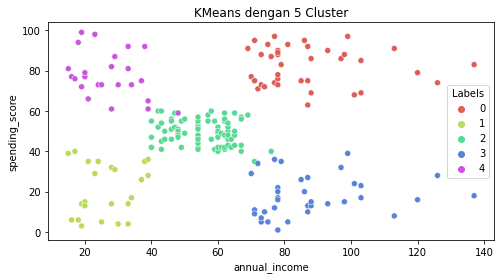

In [7]:
# membuat objek KMeans yang berisi Data hasil olah menggunakan Algoritma Kmeans..
km5 = KMeans(n_clusters=5).fit(X)

# X = df
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
                  # SUMBU X          # SUMBU Y             #ISI DALAM GRAFIK
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5)) # WARNA 
plt.title('KMeans dengan 5 Cluster')
plt.show()